In [1]:
import os
changed_dir = False
if not changed_dir:
    os.chdir("..")
    changed_dir=True

In [2]:
import matplotlib.pyplot as plt

from data.points import ANCHORS, TAG

LANG = "pl"
# LANG = "en"

TAG = {k: v for k,v in TAG.items() if k in ["P1", "P2", "P3", "P4"]}
TAG

{'P1': (1560, 1700), 'P2': (2185, 2550), 'P3': (1560, 2990), 'P4': (775, 2130)}

In [3]:

a_x, a_y = zip(*ANCHORS.values())
a_labels = ANCHORS.keys()

p_x, p_y = zip(*TAG.values())
p_labels = TAG.keys()

In [4]:
dpi = 600
width_inches = 6
height_inches = width_inches * 3/4 

In [5]:
def add_labels(a_labels, a_x, a_y):
    for label, x, y in zip(a_labels, a_x, a_y):
        x /= 1000
        y /= 1000
        plt.text(x+0.035,y+0.035, label)

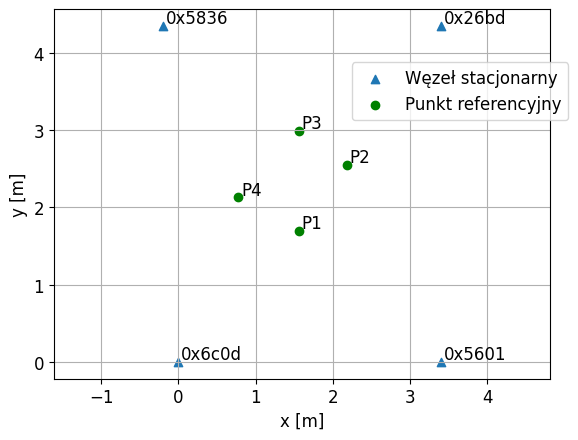

In [6]:
plt.rcParams['font.size'] = 12
plt.scatter([v/1000 for v in a_x], [v/1000 for v in a_y], c="tab:blue", marker="^", label="Anchor" if LANG!="pl" else "Węzeł stacjonarny")
add_labels(a_labels, a_x, a_y)
plt.scatter([v/1000 for v in p_x], [v/1000 for v in p_y], c="g", label="Reference point" if LANG!="pl" else "Punkt referencyjny")
add_labels(p_labels, p_x,p_y)
plt.grid(True, "both")
# plt.gcf().set_size_inches(width_inches, height_inches)
plt.axis("equal")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend(loc=(0.6,0.7))
plt.savefig(f"plots_output/anchors_and_ref_points_placement.png", dpi=dpi, bbox_inches='tight')